In [58]:
import matplotlib.pyplot as plt

import pandas as pd

import matplotlib as mpl

from pywaffle import Waffle

from highlight_text import fig_text

In [59]:
df_touches = pd.read_html("https://fbref.com/en/comps/11/possession/Serie-A-Stats")[0]
df_touches.columns = df_touches.columns.droplevel()
df_touches = df_touches.loc[20:]

In [60]:
touches1 = df_touches.iloc[:,:1]
touches2 = df_touches.iloc[:,4:10]

In [61]:
df_touches = pd.concat([touches1, touches2], axis=1)
df_touches = df_touches.sort_values(by=['Touches'], ascending=False)
df_touches = df_touches.drop('Touches', axis=1)
df_touches["Def 3rd"] = df_touches["Def 3rd"]-df_touches["Def Pen"]
df_touches["Att 3rd"] = df_touches["Att 3rd"]-df_touches["Att Pen"]

In [62]:
df_touches.head(3)

,Squad,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen
36,Sassuolo,1600,3023,7094,2916,495
29,Juventus,1343,2921,7142,3026,610
20,Atalanta,987,2451,6722,3764,686


In [63]:
df_touches['Sum'] =  df_touches.sum(axis=1)

In [64]:
df_touches

,Squad,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Sum
36,Sassuolo,1600,3023,7094,2916,495,15128
29,Juventus,1343,2921,7142,3026,610,15042
20,Atalanta,987,2451,6722,3764,686,14610
32,Napoli,1230,2749,6946,3114,595,14634
28,Inter,1271,2748,6699,3222,605,14545
30,Lazio,1550,2883,5970,2851,461,13715
34,Roma,1274,2680,6649,2513,523,13639
31,Milan,1398,2644,5879,2629,556,13106
25,Fiorentina,1234,2364,6298,2743,445,13084
22,Bologna,1494,2522,5746,2762,481,13005


In [65]:
df_touches['Def Pen'] = df_touches['Def Pen'].div(df_touches['Sum']).round(4)*100
df_touches['Def 3rd'] = df_touches['Def 3rd'].div(df_touches['Sum']).round(4)*100
df_touches['Mid 3rd'] = df_touches['Mid 3rd'].div(df_touches['Sum']).round(4)*100
df_touches['Att 3rd'] = df_touches['Att 3rd'].div(df_touches['Sum']).round(4)*100
df_touches['Att Pen'] = df_touches['Att Pen'].div(df_touches['Sum']).round(4)*100

In [66]:
df_touches = df_touches.drop("Sum", axis=1)

In [67]:
df_touches = df_touches.T

In [68]:
df_touches.columns = df_touches.iloc[0]
df_touches = df_touches.drop("Squad")

In [69]:
my_list = df_touches.columns.values.tolist()

In [70]:
df = pd.DataFrame(df_touches, columns=my_list)

In [71]:
df

,Sassuolo,Juventus,Atalanta,Napoli,Inter,Lazio,Roma,Milan,Fiorentina,Bologna,Crotone,Spezia,Torino,Parma,Genoa,Hellas Verona,Cagliari,Udinese,Sampdoria,Benevento
Def Pen,10.58,8.93,6.76,8.41,8.74,11.3,9.34,10.67,9.43,11.49,13.43,11.21,11.38,12.44,12.87,11.38,11.97,9.94,12.28,12.76
Def 3rd,19.98,19.42,16.78,18.79,18.89,21.02,19.65,20.17,18.07,19.39,24.58,21.76,23.04,23.55,23.61,19.51,20.49,21.21,21.05,23.88
Mid 3rd,46.89,47.48,46.01,47.46,46.06,43.53,48.75,44.86,48.14,44.18,43.64,46.82,45,45.18,44.56,46.03,43.73,43.13,42.38,42.52
Att 3rd,19.28,20.12,25.76,21.28,22.15,20.79,18.43,20.06,20.96,21.24,15.63,17.06,17.75,16.1,16.45,19.69,20.22,21.83,20.92,17.16
Att Pen,3.27,4.06,4.7,4.07,4.16,3.36,3.83,4.24,3.4,3.7,2.72,3.14,2.83,2.73,2.51,3.39,3.59,3.89,3.38,3.68


/Users/ttothuk/opt/anaconda3/lib/python3.8/site-packages/pywaffle/waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


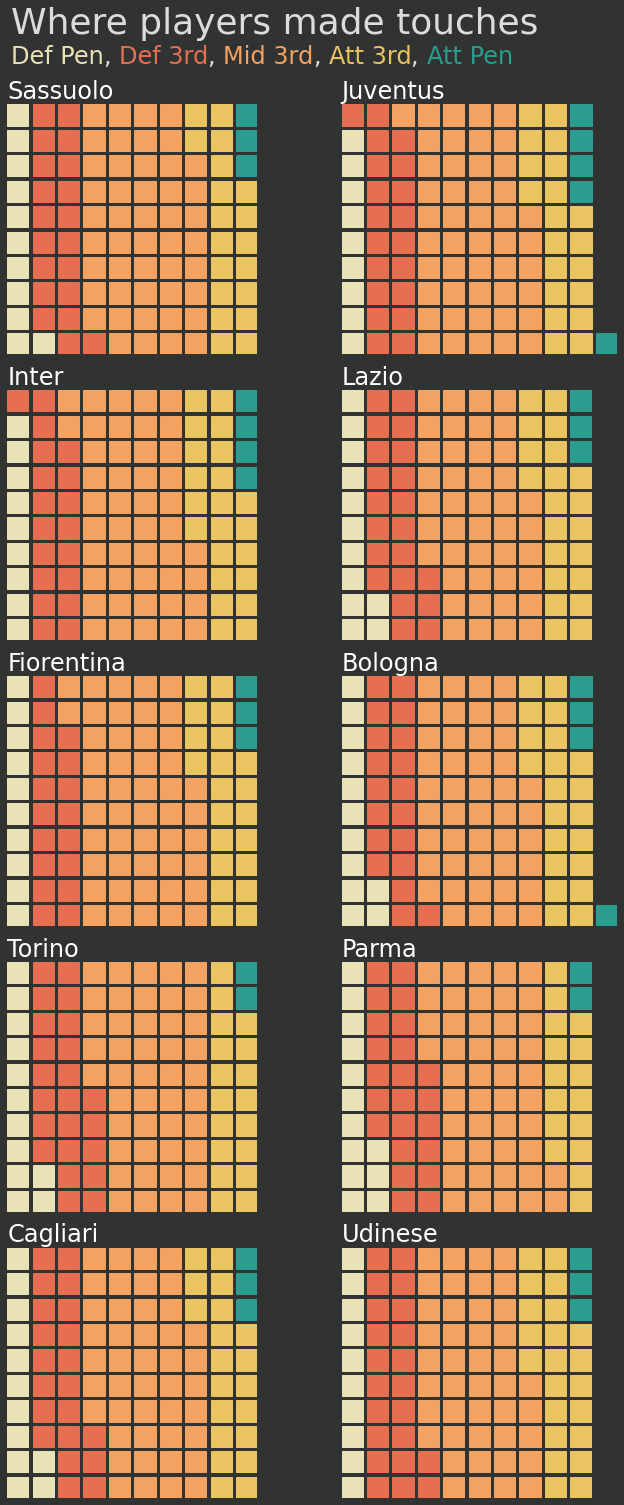

In [72]:
fig = plt.figure(
    FigureClass= Waffle,
    rows = 10,
    figsize = (20,20),
    plots = {
        '521': {
            'values': df.iloc[:,0],
            'title': {
                'label':my_list[0],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        },
        '522': {
            'values': df.iloc[:,1],
            'title': {
                'label':my_list[1],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        },
        '523': {
            'values': df.iloc[:,4],
            'title': {
                'label':my_list[4],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        },
        '524': {
            'values': df.iloc[:,5],
            'title': {
                'label':my_list[5],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        },
        '525': {
            'values': df.iloc[:,8],
            'title': {
                'label':my_list[8],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        },
        '526': {
            'values': df.iloc[:,9],
            'title': {
                'label':my_list[9],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        },
        '527': {
            'values': df.iloc[:,12],
            'title': {
                'label':my_list[12],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        },
        '528': {
            'values': df.iloc[:,13],
            'title': {
                'label':my_list[13],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        },
        '529': {
            'values': df.iloc[:,16],
            'title': {
                'label':my_list[16],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        }
        ,
        '520': {
            'values': df.iloc[:,17],
            'title': {
                'label':my_list[17],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        }
        
    },
    colors = ('#eae2b7', '#e76f51', '#f4a261','#e9c461','#2a9d8f')
)

fig_text(s = 'Where players made touches \n',
         x = .01, y=.99,
         fontsize = 36,
         color = '#DCDCDC'
)
fig_text(s = '\n<Def Pen>, <Def 3rd>, <Mid 3rd>, <Att 3rd>, <Att Pen>',
         x = .01, y=1,
         fontsize = 24,
         color = '#DCDCDC',
         highlight_colors = ['#eae2b7', '#e76f51', '#f4a261','#e9c461','#2a9d8f']
)

fig.patch.set_facecolor('#313332')

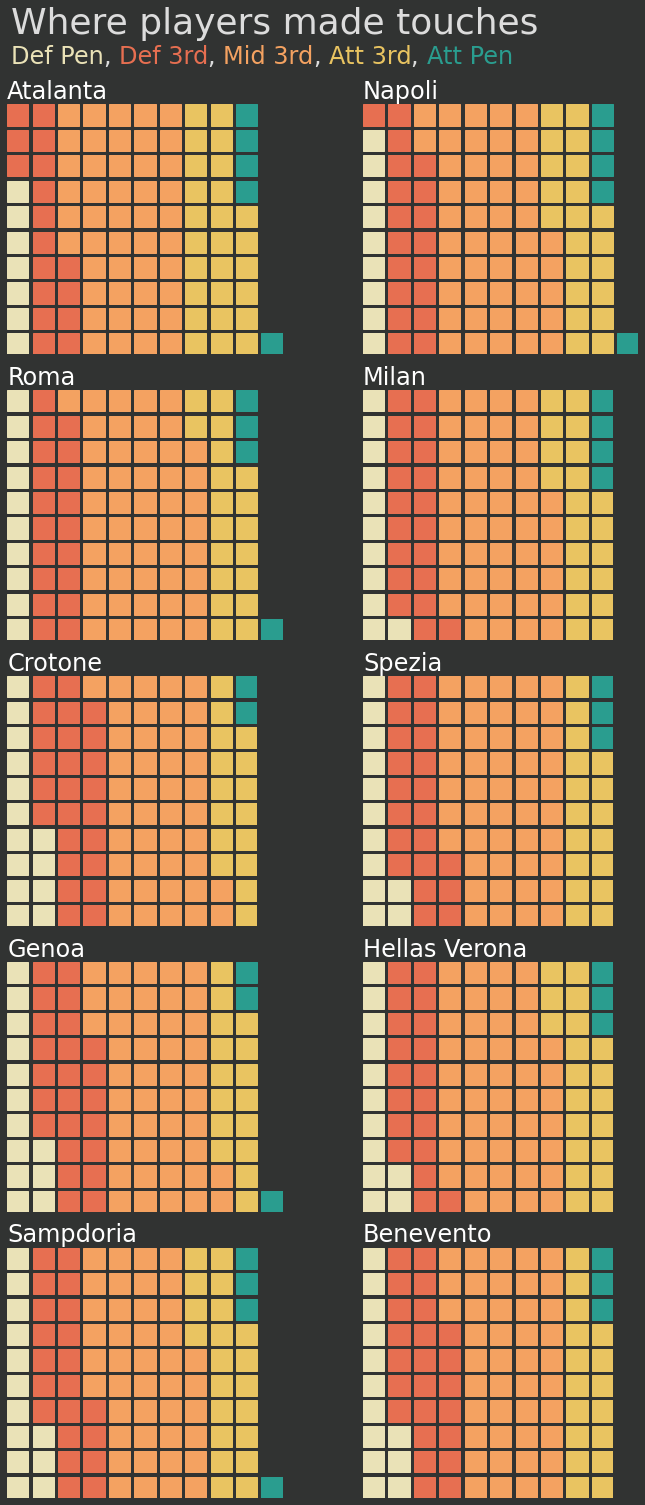

In [73]:
fig = plt.figure(
    FigureClass= Waffle,
    rows = 10,
    figsize = (20,20),
    plots = {
        '521': {
            'values': df.iloc[:,2],
            'title': {
                'label':my_list[2],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        },
        '522': {
            'values': df.iloc[:,3],
            'title': {
                'label':my_list[3],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        },
        '523': {
            'values': df.iloc[:,6],
            'title': {
                'label':my_list[6],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        },
        '524': {
            'values': df.iloc[:,7],
            'title': {
                'label':my_list[7],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        },
        '525': {
            'values': df.iloc[:,10],
            'title': {
                'label':my_list[10],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        },
        '526': {
            'values': df.iloc[:,11],
            'title': {
                'label':my_list[11],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        },
        '527': {
            'values': df.iloc[:,14],
            'title': {
                'label':my_list[14],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        },
        '528': {
            'values': df.iloc[:,15],
            'title': {
                'label':my_list[15],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        },
        '529': {
            'values': df.iloc[:,18],
            'title': {
                'label':my_list[18],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        }
        ,
        '520': {
            'values': df.iloc[:,19],
            'title': {
                'label':my_list[19],
                'color':'white',
                'loc': 'left',
                'size': 24
            }
        }
        
    },
    colors = ('#eae2b7', '#e76f51', '#f4a261','#e9c461','#2a9d8f')
)

fig_text(s = 'Where players made touches \n',
         x = .01, y=.99,
         fontsize = 36,
         color = '#DCDCDC'
)
fig_text(s = '\n<Def Pen>, <Def 3rd>, <Mid 3rd>, <Att 3rd>, <Att Pen>',
         x = .01, y=1,
         fontsize = 24,
         color = '#DCDCDC',
         highlight_colors = ['#eae2b7', '#e76f51', '#f4a261','#e9c461','#2a9d8f']
)

fig.patch.set_facecolor('#313332')